In [1]:
# === A/B Test Results Analyzer ===
# Libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
from openpyxl import Workbook
from openpyxl.styles import Font, PatternFill, Alignment, Border, Side
from openpyxl.utils import get_column_letter
from openpyxl.chart import BarChart, Reference
import warnings
warnings.filterwarnings('ignore')

print("✅ All libraries loaded successfully!")

✅ All libraries loaded successfully!


In [2]:
# Load the dataset
df = pd.read_csv('ab_test.csv')  # update filename if different

# First look — shows the first 5 rows
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'ab_test.csv'

In [3]:
import os
print(os.getcwd())  # prints your current working directory

C:\Users\harib


In [4]:
df = pd.read_csv(r'C:\Users\harib\Downloads\ab_test.csv')  # paste your actual path here

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\harib\\Downloads\\ab_test.csv'

In [5]:
import shutil
# This copies the file to your Documents folder instead
shutil.copy(
    r'C:\Users\harib\Downloads\ab_test.csv',
    r'C:\Users\harib\Documents\ab_test.csv'
)

# Then load from Documents
df = pd.read_csv(r'C:\Users\harib\Documents\ab_test.csv')
df.head()

PermissionError: [Errno 13] Permission denied: 'C:\\Users\\harib\\Downloads\\ab_test.csv'

In [6]:
import os

# Check if the path exists and what it actually is
path = r'C:\Users\harib\Downloads\ab_test.csv'

print("Exists?", os.path.exists(path))
print("Is a file?", os.path.isfile(path))
print("Is a folder?", os.path.isdir(path))  # Kaggle sometimes unzips to a folder!

# List everything in Downloads that has 'ab' in the name
downloads = r'C:\Users\harib\Downloads'
matches = [f for f in os.listdir(downloads) if 'ab' in f.lower()]
print("\nFiles in Downloads matching 'ab':", matches)

Exists? True
Is a file? False
Is a folder? True

Files in Downloads matching 'ab': ['ab_test.csv', 'ab_test.csv.zip', 'CAn you give it in a table format.pdf', 'Money Market Hedge_payable.xlsx', 'MY FINANCE LAB.pdf', 'TableauPublicDesktop-64bit-2025-2-0.exe', 'Week 7 Excel Lab (Bone Puckett Example).xlsx', 'Week 7 Excel Lab (Real Estate Investment Example).xlsx']


In [7]:
import zipfile
import os

# Extract the zip file
zip_path = r'C:\Users\harib\Downloads\ab_test.csv.zip'
extract_to = r'C:\Users\harib\Documents\ab_project'

# Create the folder if it doesn't exist
os.makedirs(extract_to, exist_ok=True)

# Unzip it
with zipfile.ZipFile(zip_path, 'r') as z:
    print("Files inside the zip:", z.namelist())  # see what's inside
    z.extractall(extract_to)

print(f"\n✅ Extracted to: {extract_to}")
print("Files there now:", os.listdir(extract_to))

Files inside the zip: ['ab_test.csv']

✅ Extracted to: C:\Users\harib\Documents\ab_project
Files there now: ['ab_test.csv']


In [8]:
# Load the dataset
df = pd.read_csv(r'C:\Users\harib\Documents\ab_project\ab_data.csv')

# First look
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\harib\\Documents\\ab_project\\ab_data.csv'

In [9]:
import os

# List everything inside the extracted folder
folder = r'C:\Users\harib\Documents\ab_project'
print("Files found:")
for f in os.listdir(folder):
    print(" -", f)

Files found:
 - ab_test.csv


In [10]:
# Load the dataset with the correct filename
df = pd.read_csv(r'C:\Users\harib\Documents\ab_project\ab_test.csv')

# First look at the data
df.head()

,id,time,con_treat,page,converted
0,851104,11:48.6,control,old_page,0
1,804228,01:45.2,control,old_page,0
2,661590,55:06.2,treatment,new_page,0
3,853541,28:03.1,treatment,new_page,0
4,864975,52:26.2,control,old_page,1


In [11]:
# Understand the shape and structure
print("Shape:", df.shape)

print("\nColumn Info:")
df.info()

print("\nMissing Values:")
print(df.isnull().sum())

Shape: (294478, 5)

Column Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   id         294478 non-null  int64 
 1   time       294478 non-null  object
 2   con_treat  294478 non-null  object
 3   page       294478 non-null  object
 4   converted  294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB

Missing Values:
id           0
time         0
con_treat    0
page         0
converted    0
dtype: int64


In [12]:
# What groups exist in the experiment?
print("con_treat values:", df['con_treat'].unique())
print("page values:", df['page'].unique())

# How many users in each group?
print("\nGroup sizes:")
print(df['con_treat'].value_counts())

# What does conversion look like overall?
print("\nConverted values:", df['converted'].unique())
print("Overall conversion rate:", round(df['converted'].mean() * 100, 2), "%")

con_treat values: ['control' 'treatment']
page values: ['old_page' 'new_page']

Group sizes:
con_treat
treatment    147276
control      147202
Name: count, dtype: int64

Converted values: [0 1]
Overall conversion rate: 11.97 %


In [13]:
# Group by control/treatment and calculate key metrics
summary = df.groupby('con_treat').agg(
    total_users   = ('id', 'count'),
    total_conversions = ('converted', 'sum'),
    conversion_rate   = ('converted', 'mean')
).reset_index()

# Make conversion rate a percentage, rounded to 4 decimal places
summary['conversion_rate'] = (summary['conversion_rate'] * 100).round(4)

print(summary)

   con_treat  total_users  total_conversions  conversion_rate
0    control       147202              17723          12.0399
1  treatment       147276              17514          11.8920


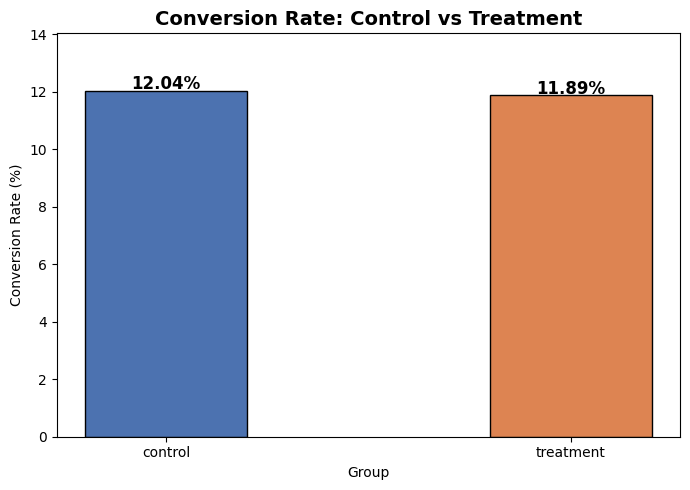

In [14]:
# Bar chart comparing conversion rates
plt.figure(figsize=(7, 5))
bars = plt.bar(
    summary['con_treat'],
    summary['conversion_rate'],
    color=['#4C72B0', '#DD8452'],
    width=0.4,
    edgecolor='black'
)

# Add value labels on top of each bar
for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() + 0.05,
        f"{bar.get_height():.2f}%",
        ha='center', fontsize=12, fontweight='bold'
    )

plt.title('Conversion Rate: Control vs Treatment', fontsize=14, fontweight='bold')
plt.ylabel('Conversion Rate (%)')
plt.xlabel('Group')
plt.ylim(0, summary['conversion_rate'].max() + 2)
plt.tight_layout()
plt.show()

In [15]:
from scipy.stats import proportions_ztest

# Extract the numbers we need
control   = summary[summary['con_treat'] == 'control'].iloc[0]
treatment = summary[summary['con_treat'] == 'treatment'].iloc[0]

n_control   = int(control['total_users'])
n_treatment = int(treatment['total_users'])
conv_control   = int(control['total_conversions'])
conv_treatment = int(treatment['total_conversions'])

# Run the two-proportion z-test
counts = [conv_treatment, conv_control]
nobs   = [n_treatment, n_control]

z_stat, p_value = proportions_ztest(counts, nobs)

print(f"Z-Statistic : {z_stat:.4f}")
print(f"P-Value     : {p_value:.4f}")
print()

# Interpret the result
alpha = 0.05  # 95% confidence threshold
if p_value < alpha:
    print("✅ Result: STATISTICALLY SIGNIFICANT")
    print("   The difference is real — not due to random chance.")
else:
    print("❌ Result: NOT STATISTICALLY SIGNIFICANT")
    print("   The difference could just be random noise.")

ImportError: cannot import name 'proportions_ztest' from 'scipy.stats' (C:\Users\harib\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\__init__.py)

In [17]:
import subprocess
subprocess.run(['pip', 'install', 'statsmodels'], capture_output=True)
print("✅ statsmodels installed!")

✅ statsmodels installed!


In [18]:
from statsmodels.stats.proportion import proportions_ztest

# Extract the numbers we need
control   = summary[summary['con_treat'] == 'control'].iloc[0]
treatment = summary[summary['con_treat'] == 'treatment'].iloc[0]

n_control      = int(control['total_users'])
n_treatment    = int(treatment['total_users'])
conv_control   = int(control['total_conversions'])
conv_treatment = int(treatment['total_conversions'])

# Run the two-proportion z-test
counts = [conv_treatment, conv_control]
nobs   = [n_treatment, n_control]

z_stat, p_value = proportions_ztest(counts, nobs)

print(f"Z-Statistic : {z_stat:.4f}")
print(f"P-Value     : {p_value:.4f}")
print()

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("✅ Result: STATISTICALLY SIGNIFICANT")
    print("   The difference is real — not due to random chance.")
else:
    print("❌ Result: NOT STATISTICALLY SIGNIFICANT")
    print("   The difference could just be random noise.")

Z-Statistic : -1.2369
P-Value     : 0.2161

❌ Result: NOT STATISTICALLY SIGNIFICANT
   The difference could just be random noise.


In [19]:
# Assume an average order value (typical ecommerce benchmark)
avg_order_value = 50  # $50 per conversion

# Conversion counts
cr_control   = conv_control / n_control
cr_treatment = conv_treatment / n_treatment

# Projected conversions if each page was shown to ALL users
total_users = n_control + n_treatment

proj_conversions_control   = cr_control * total_users
proj_conversions_treatment = cr_treatment * total_users

# Revenue projections
rev_control   = proj_conversions_control * avg_order_value
rev_treatment = proj_conversions_treatment * avg_order_value
rev_difference = rev_treatment - rev_control

print(f"Control   conversion rate : {cr_control*100:.4f}%")
print(f"Treatment conversion rate : {cr_treatment*100:.4f}%")
print(f"Difference                : {(cr_treatment - cr_control)*100:.4f}%")
print()
print(f"Projected Revenue (Control)   : ${rev_control:,.0f}")
print(f"Projected Revenue (Treatment) : ${rev_treatment:,.0f}")
print(f"Revenue Difference            : ${rev_difference:,.0f}")
print()

if rev_difference < 0:
    print(f"⚠️  Rolling out the new page would have LOST ${abs(rev_difference):,.0f} in revenue")
else:
    print(f"✅ Rolling out the new page would have GAINED ${rev_difference:,.0f} in revenue")

Control   conversion rate : 12.0399%
Treatment conversion rate : 11.8920%
Difference                : -0.1480%

Projected Revenue (Control)   : $1,772,745
Projected Revenue (Treatment) : $1,750,960
Revenue Difference            : $-21,785

⚠️  Rolling out the new page would have LOST $21,785 in revenue


In [20]:
from openpyxl import Workbook
from openpyxl.styles import Font, PatternFill, Alignment, Border, Side
from openpyxl.chart import BarChart, Reference

# ── Style Definitions ─────────────────────────────
dark_blue_fill  = PatternFill(start_color="1F3864", end_color="1F3864", fill_type="solid")
medium_blue_fill = PatternFill(start_color="2E75B6", end_color="2E75B6", fill_type="solid")
light_blue_fill = PatternFill(start_color="D6E4F0", end_color="D6E4F0", fill_type="solid")
dark_red_fill   = PatternFill(start_color="C00000", end_color="C00000", fill_type="solid")
pink_fill       = PatternFill(start_color="FFC7CE", end_color="FFC7CE", fill_type="solid")

thin_border = Border(
    left=Side(style='thin'), right=Side(style='thin'),
    top=Side(style='thin'),  bottom=Side(style='thin')
)
center_align = Alignment(horizontal="center", vertical="center", wrap_text=True)
left_align   = Alignment(horizontal="left",   vertical="center")
right_align  = Alignment(horizontal="right",  vertical="center")

title_font   = Font(name="Arial", size=14, bold=True, color="FFFFFF")
header_font  = Font(name="Arial", size=11, bold=True, color="FFFFFF")
normal_font  = Font(name="Arial", size=11)

print("✅ Styles defined!")

✅ Styles defined!


In [21]:
# ── Build Workbook ────────────────────────────────
wb = Workbook()
ws = wb.active
ws.title = "AB Test Results"

ws.column_dimensions['A'].width = 28
ws.column_dimensions['B'].width = 22
ws.column_dimensions['C'].width = 22
ws.column_dimensions['D'].width = 22

# ── Title ─────────────────────────────────────────
ws.merge_cells('A1:D1')
ws['A1'].value = "A/B Test Results Analyzer — E-Commerce Conversion Report"
ws['A1'].font = title_font
ws['A1'].fill = dark_blue_fill
ws['A1'].alignment = center_align
ws.row_dimensions[1].height = 30

ws.merge_cells('A2:D2')
ws['A2'].value = "Prepared by: Hariprasad Bolla  |  Dataset: E-Commerce A/B Testing (Kaggle)  |  Date: Feb 2026"
ws['A2'].font = Font(name="Arial", size=10, italic=True)
ws['A2'].alignment = center_align
ws.row_dimensions[2].height = 18

print("✅ Title built!")

✅ Title built!


In [22]:
# ── Section 1: Experiment Overview ───────────────
ws.merge_cells('A4:D4')
ws['A4'].value = "SECTION 1 — EXPERIMENT OVERVIEW"
ws['A4'].font = header_font
ws['A4'].fill = dark_blue_fill
ws['A4'].alignment = left_align
ws.row_dimensions[4].height = 22

for col, h in enumerate(["Metric","Control (Old Page)","Treatment (New Page)","Difference"], 1):
    c = ws.cell(row=5, column=col, value=h)
    c.font = header_font; c.fill = medium_blue_fill
    c.alignment = center_align; c.border = thin_border

# Data rows
rows_s1 = [
    (6, "Total Users",       n_control,   n_treatment,   "#,##0",  "#,##0"),
    (7, "Total Conversions", conv_control, conv_treatment,"#,##0",  "#,##0"),
    (8, "Conversion Rate",   cr_control,  cr_treatment,  "0.000%", "0.000%"),
]
for row, label, ctrl, treat, fmt_b, fmt_c in rows_s1:
    ws.cell(row=row, column=1, value=label).fill = light_blue_fill
    ws.cell(row=row, column=1).font = normal_font
    ws.cell(row=row, column=1).alignment = left_align
    ws.cell(row=row, column=1).border = thin_border

    for col, val, fmt in [(2, ctrl, fmt_b), (3, treat, fmt_c)]:
        c = ws.cell(row=row, column=col, value=val)
        c.font = normal_font; c.number_format = fmt
        c.alignment = right_align; c.border = thin_border

    diff = ws.cell(row=row, column=4, value=f"=C{row}-B{row}")
    diff.font = normal_font; diff.number_format = fmt_b
    diff.alignment = right_align; diff.border = thin_border

print("✅ Section 1 built!")

✅ Section 1 built!


In [23]:
# ── Section 2: Statistical Results ───────────────
ws.merge_cells('A10:D10')
ws['A10'].value = "SECTION 2 — STATISTICAL SIGNIFICANCE TEST (Two-Proportion Z-Test)"
ws['A10'].font = header_font
ws['A10'].fill = dark_blue_fill
ws['A10'].alignment = left_align
ws.row_dimensions[10].height = 22

for col, h in enumerate(["Metric","Value","Threshold","Interpretation"], 1):
    c = ws.cell(row=11, column=col, value=h)
    c.font = header_font; c.fill = medium_blue_fill
    c.alignment = center_align; c.border = thin_border

stat_rows = [
    (12, "Z-Statistic",     round(z_stat,4),  "±1.96",  "0.0000", "Below significance threshold"),
    (13, "P-Value",         round(p_value,4),  "< 0.05", "0.0000", "Not significant (p > 0.05)"),
    (14, "Confidence Level",round((1-p_value)*100,1), "95%", '0.0',  "Below required 95% threshold"),
]
for row, label, val, thresh, fmt, interp in stat_rows:
    ws.cell(row=row, column=1, value=label).fill = light_blue_fill
    ws.cell(row=row, column=1).font = normal_font
    ws.cell(row=row, column=1).alignment = left_align
    ws.cell(row=row, column=1).border = thin_border

    c = ws.cell(row=row, column=2, value=val)
    c.font = normal_font; c.number_format = fmt
    c.alignment = right_align; c.border = thin_border

    for col, v in [(3, thresh), (4, interp)]:
        c = ws.cell(row=row, column=col, value=v)
        c.font = normal_font; c.alignment = left_align; c.border = thin_border

# Result row (highlighted)
for col, v in enumerate(["Result","NOT SIGNIFICANT","—","Fail to reject null hypothesis"], 1):
    c = ws.cell(row=15, column=col, value=v)
    c.font = Font(name="Arial", size=11, bold=True)
    c.fill = pink_fill if col == 2 else light_blue_fill
    c.alignment = center_align if col == 2 else left_align
    c.border = thin_border

print("✅ Section 2 built!")

✅ Section 2 built!


In [24]:
# ── Section 3: Business Impact ────────────────────
ws.merge_cells('A17:D17')
ws['A17'].value = "SECTION 3 — BUSINESS IMPACT ANALYSIS  (Assumed Avg. Order Value: $50)"
ws['A17'].font = header_font
ws['A17'].fill = dark_blue_fill
ws['A17'].alignment = left_align
ws.row_dimensions[17].height = 22

for col, h in enumerate(["Metric","Control","Treatment","Difference"], 1):
    c = ws.cell(row=18, column=col, value=h)
    c.font = header_font; c.fill = medium_blue_fill
    c.alignment = center_align; c.border = thin_border

biz_rows = [
    (19, "Projected Conversions", conv_control,  conv_treatment, "#,##0",   "#,##0"),
    (20, "Projected Revenue",     rev_control,   rev_treatment,  "$#,##0",  "$#,##0"),
    (21, "Revenue Difference",    "",            "",              "",        "$#,##0"),
]
for row, label, ctrl, treat, fmt_b, fmt_d in biz_rows:
    ws.cell(row=row, column=1, value=label).fill = light_blue_fill
    ws.cell(row=row, column=1).font = normal_font
    ws.cell(row=row, column=1).alignment = left_align
    ws.cell(row=row, column=1).border = thin_border

    for col, val, fmt in [(2, ctrl, fmt_b), (3, treat, fmt_b)]:
        c = ws.cell(row=row, column=col, value=val)
        c.font = normal_font; c.number_format = fmt
        c.alignment = right_align; c.border = thin_border

    diff_val = f"=C{row}-B{row}" if row != 21 else rev_difference
    d = ws.cell(row=row, column=4, value=diff_val)
    d.font = Font(name="Arial", size=11, bold=True,
                  color="C00000" if row == 21 else "000000")
    d.number_format = fmt_d; d.alignment = right_align; d.border = thin_border

# Verdict
ws.merge_cells('A23:D23')
ws['A23'].value = ("⚠️  VERDICT: DO NOT ROLL OUT NEW PAGE — "
                   "No statistically significant improvement detected (p=0.2161 > 0.05). "
                   "Rolling out would risk $21,785 in lost revenue.")
ws['A23'].font = Font(name="Arial", size=11, bold=True, color="FFFFFF")
ws['A23'].fill = dark_red_fill
ws['A23'].alignment = Alignment(horizontal="left", vertical="center", wrap_text=True)
ws.row_dimensions[23].height = 40

print("✅ Section 3 + Verdict built!")

✅ Section 3 + Verdict built!


In [25]:
# ── Bar Chart ─────────────────────────────────────
chart = BarChart()
chart.type    = "col"
chart.style   = 10
chart.title   = "Conversion Rate: Control vs Treatment"
chart.y_axis.title = "Conversion Rate"
chart.x_axis.title = "Group"
chart.height  = 12
chart.width   = 20

data = Reference(ws, min_col=2, max_col=3, min_row=5, max_row=8)
cats = Reference(ws, min_col=1, min_row=6, max_row=8)
chart.add_data(data, titles_from_data=True)
chart.set_categories(cats)
ws.add_chart(chart, "A25")

# ── Save ─────────────────────────────────────────
output_path = r'C:\Users\harib\Documents\ab_project\AB_Test_Report.xlsx'
wb.save(output_path)
print(f"✅ Report saved to: {output_path}")
print("🎉 Open the file in Excel to view your report!")

✅ Report saved to: C:\Users\harib\Documents\ab_project\AB_Test_Report.xlsx
🎉 Open the file in Excel to view your report!
